Import necessary libraries


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier

load the dataset

In [ ]:
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
training_images.shape , training_labels.shape

((60000, 28, 28), (60000,))

Preprocess the data

In [3]:
# Normalize the data
training_images , test_images = training_images/255.0 , test_images /255.0

visualize the dataset


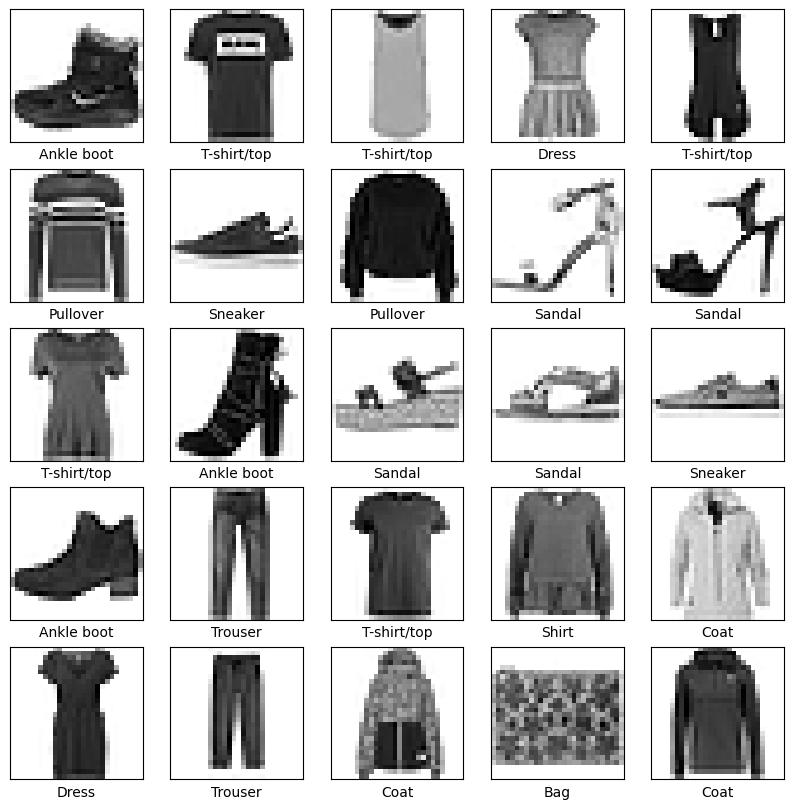

In [ ]:
# define name for each item to use in visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))  # put the fig size

for i in range(25):
    plt.subplot(5, 5, i+1)  # use subPlot to show every 5 plot in one line
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i]])
plt.show()

In [ ]:
unique_values = np.unique(training_labels)
value_counts = [np.count_nonzero(training_labels == val) for val in unique_values]

print(unique_values)
print(value_counts)

[0 1 2 3 4 5 6 7 8 9]
[6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]


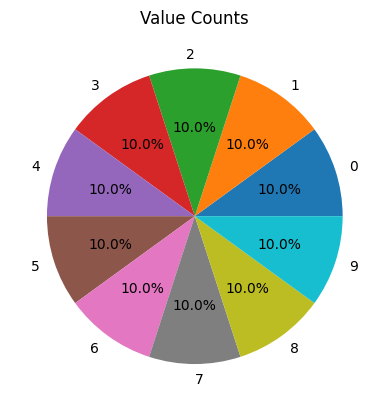

In [ ]:
plt.pie(value_counts, labels=unique_values, autopct='%1.1f%%')
plt.title('Value Counts')
plt.show()

Define the CNN model and evaluate it

In [ ]:
CNN_model = Sequential([
layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
layers.MaxPooling2D(2, 2),
layers.Conv2D(64, (3,3), activation='relu'),
layers.MaxPooling2D(2,2),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(10, activation='softmax')])

CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Reshape the data for CNN
training_images_cnn = training_images.reshape(60000,28,28,1)
test_images_cnn = test_images.reshape(10000,28,28,1)

In [ ]:
# train the CNN model
history = CNN_model.fit(training_images_cnn , training_labels , epochs= 5,validation_data=(test_images_cnn,test_labels))

Epoch 1/5
1875/1875 [==============================] - 101s 53ms/step - loss: 0.4366 - accuracy: 0.8399 - val_loss: 0.3547 - val_accuracy: 0.8729
Epoch 2/5
1875/1875 [==============================] - 102s 55ms/step - loss: 0.2926 - accuracy: 0.8935 - val_loss: 0.3142 - val_accuracy: 0.8851
Epoch 3/5
1875/1875 [==============================] - 98s 52ms/step - loss: 0.2485 - accuracy: 0.9074 - val_loss: 0.2738 - val_accuracy: 0.8983
Epoch 4/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.2144 - accuracy: 0.9201 - val_loss: 0.2722 - val_accuracy: 0.9000
Epoch 5/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.1898 - accuracy: 0.9294 - val_loss: 0.2516 - val_accuracy: 0.9117


In [ ]:
# print accuracy and val_loss for CNN model
print( 'accuracy for each Epoch :' , history.history['accuracy'])
print( 'val_loss for each Epoch :' , history.history['val_loss'])

accuracy for each Epoch : [0.8399333357810974, 0.8935333490371704, 0.9074000120162964, 0.920116662979126, 0.9293500185012817]
val_loss for each Epoch : [0.35470476746559143, 0.31416308879852295, 0.2738255262374878, 0.2722186744213104, 0.25164246559143066]


Flatten the data for Random Forest and SVM

In [8]:
training_images = training_images.reshape(-1, 784) #Flatten the training_images
test_images = test_images.reshape(-1, 784)         #Flatten the test_images

Define the Random forest model with grid search and evaluate it

In [ ]:
# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy']
}

# Create a RandomForestClassifier object
rfc_model = RandomForestClassifier()

# Create a GridSearchCV object to perform the search
grid_search = GridSearchCV(estimator=rfc_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(training_images, training_labels)

# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_

# Create a new RandomForestClassifier object using the best hyperparameters
rfc_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], criterion=best_params['criterion'])

# Train the model on the training data
rfc_model.fit(training_images, training_labels)

# Make predictions on the test data
y_pred_rfc = rfc_model.predict(test_images)

Accuracy score: 0.8778


<Axes: >

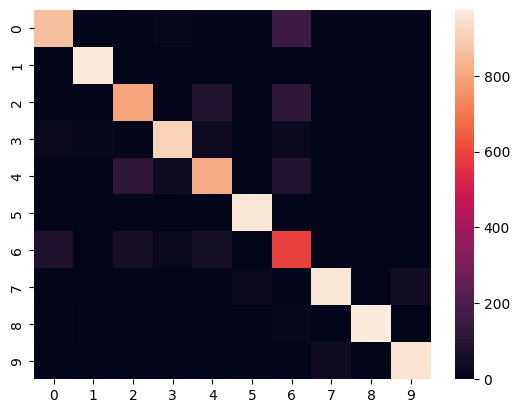

In [ ]:
# Calculate the accuracy score
accuracy_rfc = accuracy_score(y_pred_rfc, test_labels)

# Print the accuracy
print(f"Accuracy score: {accuracy_rfc}")

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_pred_rfc, test_labels))

Define the LogisticRegression model with grid search and evaluate it

In [ ]:
# Define the hyperparameters to search over
param_grid = {
    'C': [0.1, 10, 13],
    'penalty': ['l1', 'l2']
}

# Create a Logistic Regression object
lr_model = LogisticRegression(max_iter=1000)

# Create a GridSearchCV object to perform the search
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(training_images, training_labels)

# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_

# Create a new Logistic Regression object using the best hyperparameters
lr_model = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], max_iter=1000)

# Train the model on the training data
lr_model.fit(training_images, training_labels)

# Make predictions on the test data
y_pred_lr = lr_model.predict(test_images)

Accuracy score: 0.8462


<Axes: >

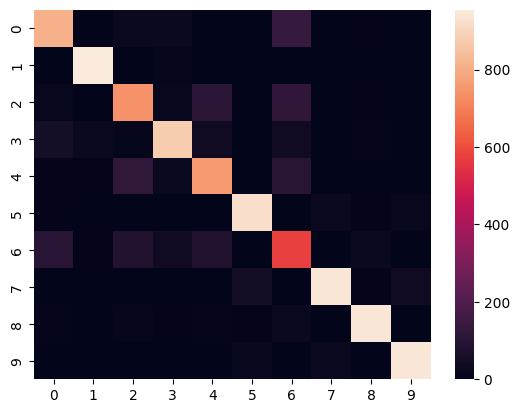

In [10]:
# Calculate the accuracy score
accuracy_lr = accuracy_score(y_pred_lr, test_labels)

# Print the accuracy score
print(f"Accuracy score: {accuracy_lr}")

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_pred_lr, test_labels))

 use a bar chart To compare the accuracies of three models

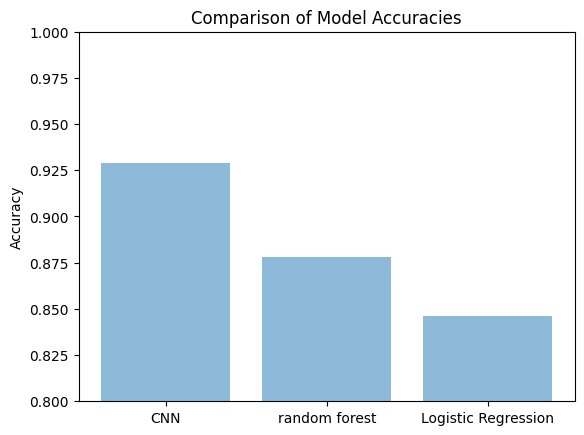

In [15]:
model_names = ["CNN", "random forest", "Logistic Regression"]
accuracies = [0.929, 0.878, 0.846]

# Set the x-axis labels to the model names
x_pos = np.arange(len(model_names))

# Create the bar chart
plt.bar(x_pos, accuracies, align='center', alpha=0.5)

# Set the y-axis limits
plt.ylim([0.8, 1.0])

# Set the x-axis ticks to the model names
plt.xticks(x_pos, model_names)

# Set the y-axis label
plt.ylabel('Accuracy')

# Set the chart title
plt.title('Comparison of Model Accuracies')

# Display the chart
plt.show()